In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# TODO use lightning?
import piqa
import utils
from models import DIP

In [13]:
images = utils.load_images('./data/celeba10/')
noisy_images = [utils.get_noisy_image(images[i], 0.05) for i, _ in enumerate(images)]

In [14]:
input_channels = 32
deep_channels = [8, 16, 32, 64, 128]
skip_channels = [0, 0, 0, 4, 4]

dip = DIP(input_channels, deep_channels, skip_channels, epochs=2400)

denoised_images = []
for i, image in enumerate(noisy_images[:3]):
  denoised_images.append(dip.denoise(image, id=i, verbose=False))

0: Training on cuda:0
----------
Finished training in 00:01:03

1: Training on cuda:0
----------
Finished training in 00:01:01

2: Training on cuda:0
----------
Finished training in 00:01:05



In [15]:
denoised_images = [image.detach().cpu() for image in denoised_images]
noisy_images = [image.cpu() for image in noisy_images]

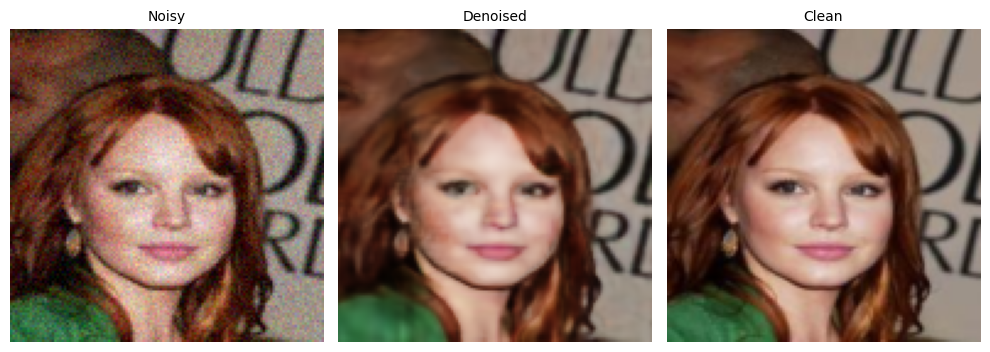

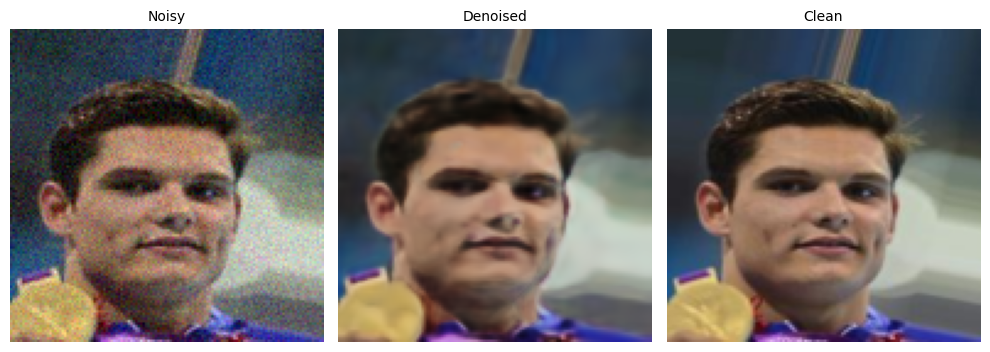

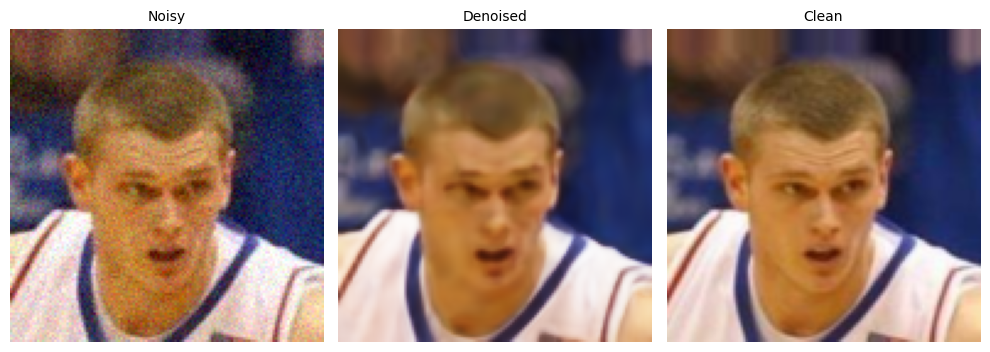

IndexError: list index out of range

In [16]:
for i in range(len(images)):
  utils.plot_row([noisy_images[i], denoised_images[i], images[i]], ['Noisy', 'Denoised', 'Clean'])

In [ ]:
# psnr = piqa.PSNR()
# noisy_psnr = psnr(noisy_img, img).item()
# denoised_psnr = psnr(denoised_img, img).item()

# print('PSNR (↑)')
# print('----------')
# print(f'Noisy: {noisy_psnr}')
# print(f'Denoised: {denoised_psnr}')

In [ ]:
# ssim = piqa.SSIM()
# noisy_ssim = ssim(noisy_img, img).item()
# denoised_ssim = ssim(denoised_img, img).item()

# print('SSIM (↑)')
# print('----------')
# print(f'Noisy: {noisy_ssim}')
# print(f'Denoised: {denoised_ssim}')